In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [3]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:

# Replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [5]:
# Printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:

# Checking the number of rows and columns in the dataframe
print(mail_data.shape)

(5572, 2)


In [7]:
# Label spam mail as 0; ham mail as 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1

In [8]:
# Separating the data as texts and labels
X = mail_data['Message']
Y = mail_data['Category']

In [9]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [10]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [11]:
# Splitting the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [12]:
print(X.shape)

(5572,)


In [13]:
print(X_train.shape)

(4457,)


In [14]:
print(X_test.shape)

(1115,)


In [15]:
# Transform the text data to feature vectors that can be used as input to the Naive Bayes model
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [16]:
# Convert Y_train and Y_test values to integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [17]:

print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [18]:
print(X_train_features)

  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24920025316220423
  (4455, 3922)	0.31287563163368587
  (4455, 6916)	0.19636985317119715
  (4455, 4715)	0.30714144758811196
  (

In [19]:
# Initialize the Naive Bayes model
model = MultinomialNB()

In [20]:

# Training the Naive Bayes model with the training data
model.fit(X_train_features, Y_train)


MultinomialNB()

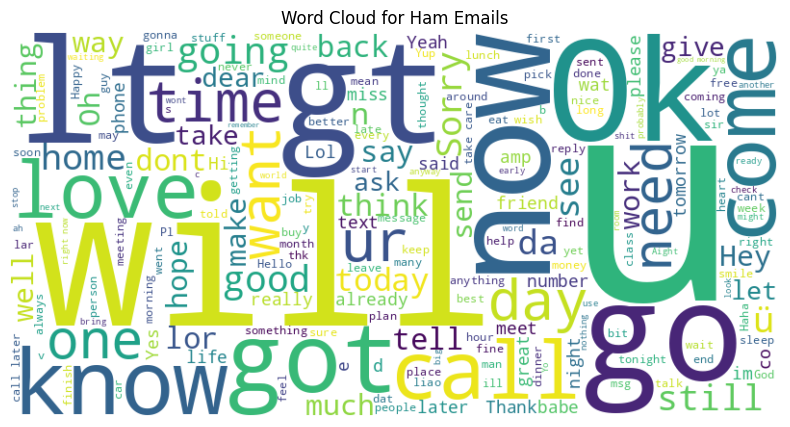

In [21]:
# Extract ham messages
ham_messages = " ".join(mail_data[mail_data['Category'] == 1]['Message'])

# Generate the word cloud
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()


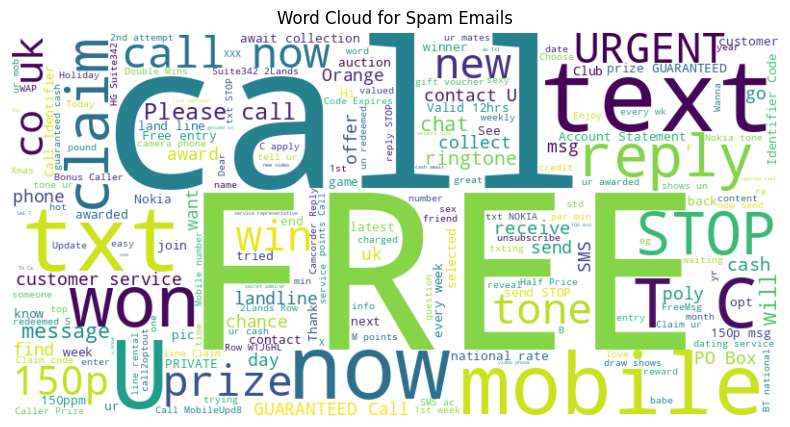

In [22]:
# Extract spam messages
spam_messages = " ".join(mail_data[mail_data['Category'] == 0]['Message'])

# Generate the word cloud
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

In [24]:
# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9807045097599282


In [25]:
# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9730941704035875


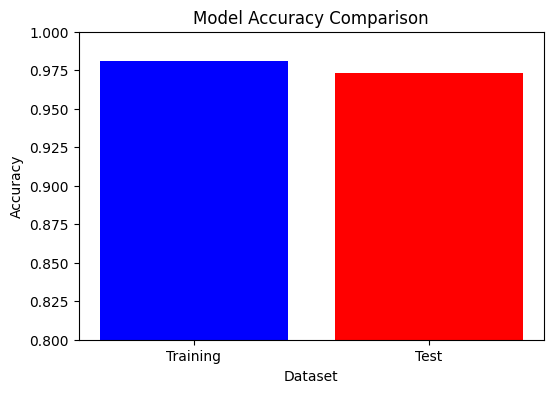

In [26]:
# Data for accuracy
accuracy_data = {'Dataset': ['Training', 'Test'], 'Accuracy': [accuracy_on_training_data, accuracy_on_test_data]}

# Create a DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(accuracy_df['Dataset'], accuracy_df['Accuracy'], color=['blue', 'red'])
plt.ylim(0.8, 1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.show()

In [29]:
# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, prediction_on_test_data)
recall = recall_score(Y_test, prediction_on_test_data)
f1 = f1_score(Y_test, prediction_on_test_data)
accuracy=accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.9730941704035875
Precision: 0.9696969696969697
Recall: 1.0
F1-Score: 0.9846153846153847


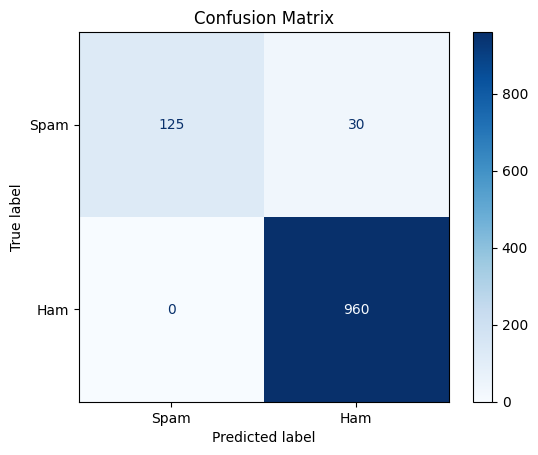

In [28]:
# Confusion matrix
cm = confusion_matrix(Y_test, prediction_on_test_data)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Spam', 'Ham'])
display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Example input email for prediction
input_mail = ["I've been searching for the right words to thank you for this breather. I promise I won't take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making prediction
prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0] == 1):
    print('Ham mail')
else:
    print('Spam mail')


[1]
Ham mail
